In [1]:
import pylab
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
flow = pd.read_csv("flow.tsv", na_values=['-'], delimiter="\t", error_bad_lines=False)
occupancy = pd.read_csv("occupancy.tsv", na_values=['-'], delimiter="\t", error_bad_lines=False)
speed = pd.read_csv("speed.tsv", na_values=['-'], delimiter="\t", error_bad_lines=False)
timestamp = pd.read_csv("timestamp.tsv", na_values=['-'], delimiter="\t", error_bad_lines=False)

In [ ]:
flow.head()

In [3]:
df = pd.concat([flow,occupancy,speed,timestamp], axis=1)

In [ ]:
# df.head()

In [4]:
df.columns = ['flow1','flow2','flow3','flow4','flow5','flow6','occupancy1','occupancy2','occupancy3','occupancy4','occupancy5','occupancy6','speed1','speed2','speed3','speed4','speed5','speed6','timestamp']
df.head()

flow1  flow2  flow3  flow4  flow5  flow6  occupancy1  occupancy2  \
0   17.0   18.0   26.0   28.0   23.0   27.0        10.0        14.0   
1   22.0   23.0   27.0   21.0   19.0   29.0        13.0        12.0   
2   19.0   20.0   26.0   24.0   23.0   17.0        14.0        11.0   
3   10.0   24.0   23.0   20.0   23.0   22.0         5.0        15.0   
4   17.0   15.0   26.0   29.0   24.0   21.0        10.0         8.0   

   occupancy3  occupancy4  occupancy5  occupancy6  speed1  speed2  speed3  \
0        14.0        13.0        15.0        10.0    63.8    49.2    58.8   
1        12.0        12.0        10.0         9.0    46.8    46.8    59.4   
2        15.0        14.0        15.0         5.0    45.0    49.2    64.8   
3        17.0        11.0        12.0         9.0    43.2    49.2    56.4   
4        11.0        15.0        14.0         6.0    47.4    51.0    64.2   

   speed4  speed5  speed6            timestamp  
0    48.6    57.0    73.2  2009-08-19T15:06:21  
1    42.6    52.2    72.6  2009-08-19T15:07:21  
2    46.8    52.8    72.6  2009-08-19T15:08:22  
3    42.0    51.6    63.6  2009-08-19T15:09:22  
4    42.6    50.4    71.4  2009-08-19T15:10:22

In [5]:
df1 =  pd.DataFrame({"flow" : df.flow1, "occupancy" : df.occupancy1,"speed" : df.speed1,"timestamp" : df.timestamp,"detector" : "x"})
df2 = pd.DataFrame({"flow" : df.flow2, "occupancy" : df.occupancy2,"speed" : df.speed2,"timestamp" : df.timestamp,"detector" : "y"})
df3 = pd.DataFrame({"flow" : df.flow3, "occupancy" : df.occupancy3,"speed" : df.speed3,"timestamp" : df.timestamp,"detector" : "z"})
df4 = pd.DataFrame({"flow" : df.flow4, "occupancy" : df.occupancy4,"speed" : df.speed4,"timestamp" : df.timestamp,"detector" : "x1"})
df5 = pd.DataFrame({"flow" : df.flow5, "occupancy" : df.occupancy5,"speed" : df.speed5,"timestamp" : df.timestamp,"detector" : "x1"})
df6 = pd.DataFrame({"flow" : df.flow6, "occupancy" : df.occupancy6,"speed" : df.speed6,"timestamp" : df.timestamp,"detector" : "x1"})

In [7]:
frames = [df1, df2, df3, df4, df5, df6]
result = pd.concat(frames)

In [8]:
result = result.sort_values("timestamp")

In [ ]:
result.head(10)

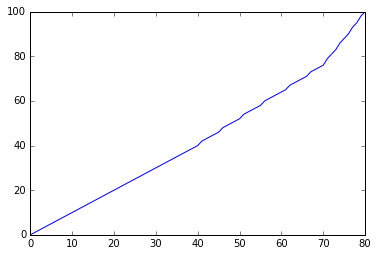

In [9]:
# Finding outlier values for Occoupancy
val = np.sort(result["occupancy"].unique())
plt.plot(val)

# so keeping occupancy threshold as 120 since all values above them show a steep change indicating possible outliers.
# jam_occupancy_threshold = 120

In [12]:
print np.sort(result["speed"].unique())

[ -58.6  -57.5  -55.1 ...,  206.8  209.1    nan]


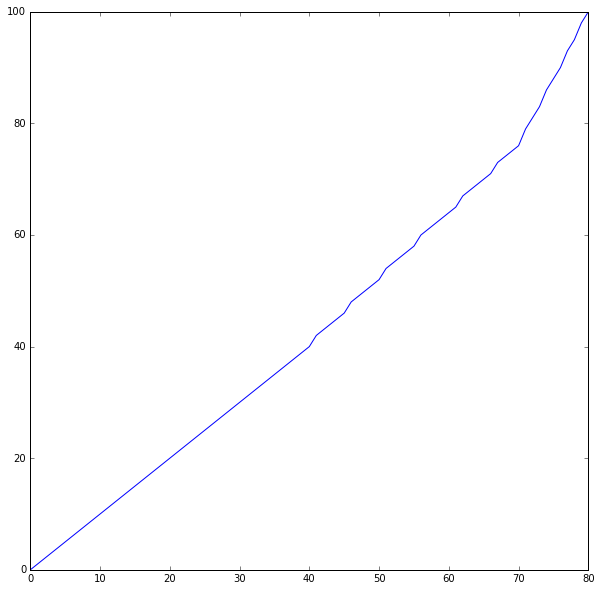

In [13]:
# Outlier speed visualization
plt.figure(figsize=(10,10))
# plt.xlim(550, 650)
plt.plot(np.sort(result["occupancy"].unique()))

In [14]:
# result[(pd.isnull(result['speed'])) | (pd.isnull(result['occupancy'])) | (pd.isnull(result['flow']))]

In [15]:
removeResult1 = result[(result['speed'] < 0) | (result['flow'] < 0)]
removeResult2 = result[(result['flow'] == 0) & (result['speed'] > 0)]
jam_occupancy_threshold = 100
removeResult3 = result[((result['speed'] == 0) & 
                            (result['flow'] == 0) & 
                            (result['occupancy'] != 0) & 
                            (result['occupancy'] < jam_occupancy_threshold))]
# skewed data
removeResult4 = result[(result['speed'] == 0) & (result['flow'] == 0) & (result["occupancy"] == 0)]
removeResult5 = result[(result['speed'] == 0) & (result['flow'] != 0) & (result["occupancy"] == 0)]
removeResult6 = result[(pd.isnull(result['speed'])) | (pd.isnull(result['occupancy'])) | (pd.isnull(result['flow']))]
# removeResult7 = result[result['occupancy'] < jam_occupancy_threshold] # occupancy increases rapidly after 80, mostly outliers

In [16]:
result.head()

detector  flow  occupancy  speed            timestamp
0        x  17.0       10.0   63.8  2009-08-19T15:06:21
0        y  18.0       14.0   49.2  2009-08-19T15:06:21
0       x1  27.0       10.0   73.2  2009-08-19T15:06:21
0       x1  28.0       13.0   48.6  2009-08-19T15:06:21
0       x1  23.0       15.0   57.0  2009-08-19T15:06:21

In [17]:
result = pd.concat([result,removeResult1,removeResult1]).drop_duplicates(keep=False)
result = pd.concat([result,removeResult2,removeResult2]).drop_duplicates(keep=False)
result = pd.concat([result,removeResult3,removeResult3]).drop_duplicates(keep=False)
result = pd.concat([result,removeResult4,removeResult4]).drop_duplicates(keep=False)
result = pd.concat([result,removeResult5,removeResult5]).drop_duplicates(keep=False)
result = pd.concat([result,removeResult6,removeResult6]).drop_duplicates(keep=False)
# result = pd.concat([result,removeResult7,removeResult7]).drop_duplicates(keep=False)

In [18]:
result = result.sort_values(["flow"])

In [19]:
def sampleData(data, threshold, columnName):
    flowBins = np.zeros(shape=(20,), dtype = object)
    data = data.sort_values(columnName)
    difference = threshold
    high  = difference
    low = 0;
    for i in range(0, 20, 1):
        b = data[data[columnName] < high]
        b = b[b[columnName] >= low]
        flowBins[i] = b
        low = high
        high = high + difference
    return flowBins

In [20]:
flowBins = np.zeros(shape=(20,), dtype = object)
flowBins = sampleData(result, 5 ,"flow")    

In [21]:

flow_occupancy_bin = np.ndarray(shape=(20,20), dtype = object)
for i in range(0,20,1):
    data = pd.DataFrame(flowBins[i])
    flow_occupancy_bin[i] = sampleData(data, 5 ,"occupancy") 

In [22]:
flow_occupancy_speed_bin = np.ndarray(shape=(20,20,20), dtype = object)
for i in range(0,20,1):
    for j in range(0,20,1):
        data = flow_occupancy_bin[i][j];
        flow_occupancy_speed_bin[i][j] = sampleData(data, 11 ,"speed") 

In [23]:
!mkdir output

In [24]:
final_result = pd.DataFrame(columns = ["detector","flow","occupancy","speed","timestamp", "probability"])
total_points = len(result)
#final_result = ["0" , "0", "0", "0"]
for i in range(0,20,1):
    for j in range(0,20,1):
        for k in range(0,20,1):
            prob_data = flow_occupancy_speed_bin[i][j][k]
            points_inside_box = prob_data.shape[0]
            f = prob_data.flow.max() - prob_data.flow.min()
            o = prob_data.occupancy.max() - prob_data.occupancy.min()
            s = prob_data.speed.max() - prob_data.speed.min()
            #volume = f*o*s
            volume = 275
            if(volume == 0): volume =1
            probability = points_inside_box/float(total_points * volume)
#             print(prob_data)
            prob_data["probability"] = probability
            prob_data.to_csv("output/out" + str(i) + '-' + str(j) + '-' + str(k) + ".csv",sep="\t")
#             print(prob_data.head(1))
#           final_result.add([prob_data['flow'], prob_data['speed'], prob_data['occupancy'], prob_data['probability']])
            #final_result_align, prob_data_align = final_result.align(prob_data,axis=1)
            #final_result = pd.concat([final_result_align, prob_data_align])
            #final_result = np.append(final_result, [prob_data['flow'], prob_data['speed'], prob_data['occupancy'], prob_data['probability']])

In [25]:
! cat output/*.csv > merged.csv

In [26]:
!rm -rf output/

In [27]:
merged = pd.read_csv("merged.csv", na_values=['-'], delimiter="\t", error_bad_lines=False)

/Users/abhisek/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (2,3,4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [28]:
removeHeader = merged[merged["probability"] == "probability"]

In [29]:
merged = pd.concat([merged,removeHeader,removeHeader]).drop_duplicates(keep=False)

In [30]:
merged.tail()

Unnamed: 0 detector  flow occupancy speed            timestamp  \
18045346   1082071.0        z  45.0      45.0  14.4  2011-11-15T06:12:15   
18045347     77996.0       x1  49.0      45.0  15.0  2009-10-14T09:04:18   
18045348   1798779.0       x1  45.0      45.0  15.0  2013-04-20T13:23:37   
18045349    228053.0       x1  46.0      46.0  15.6  2010-01-27T06:50:46   
18045350     44970.0        x  46.0      48.0  16.2  2009-09-21T08:17:47   

                probability  
18045346  3.02402431582e-09  
18045347  3.02402431582e-09  
18045348  3.02402431582e-09  
18045349  3.02402431582e-09  
18045350  3.02402431582e-09

In [31]:
# merged = merged.reset_index(drop=True)
merged["probability"] = merged["probability"].apply(pd.to_numeric)
merged = merged.sort_values(["probability"])
final_columns = ['flow', 'speed', 'occupancy', 'probability']
merged = merged[final_columns]

In [ ]:
merged.tail()

flow         speed occupancy  probability
1502485    1          49.8         1     0.000396
1502486    1          49.8         1     0.000396
1502487    1          49.8         1     0.000396
1502469    3          49.8         2     0.000396
2442007  3.0  54.680664896       2.0     0.000396

In [ ]:
# merged
final_result = pd.DataFrame(columns = ["flow","speed","occupancy", "probability"])
for i in range(0,len(merged),100):
    final_result = final_result.append(merged.iloc[[i]])

In [ ]:
final_result.to_csv("3532.txt",sep="\t", index=False)

In [ ]:
final_result.ta()

In [ ]:
# len(merged)